In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt

## Compare BTC BBW and BTC N_price

In [2]:
data= pd.read_csv('1718hourlyPrice_withZEC.csv')
data['time'] = pd.to_datetime(data['time'])

BBW = pd.read_csv('BBW.csv')
dataCompare = data[data['time'].isin(BBW.time)]
BBW['time'] = pd.to_datetime(BBW['time'])
BTC_norm = (dataCompare.BTC - dataCompare.BTC.min()) / (dataCompare.BTC.max() - dataCompare.BTC.min()) 

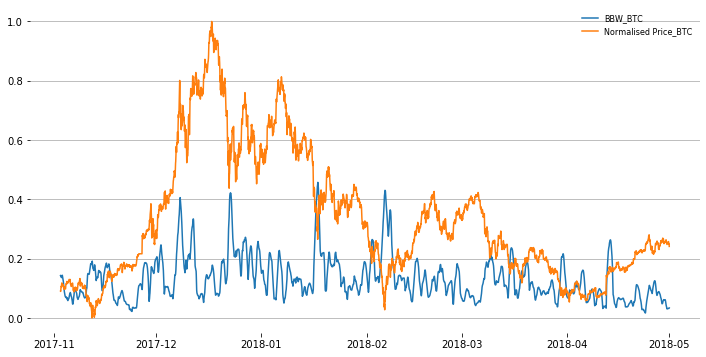

In [4]:
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)

plt.plot(BBW.set_index(pd.to_datetime(BBW.time))['BTC'], label = 'BBW_BTC')
plt.plot(dataCompare.time,BTC_norm.values,label= 'Normalised Price_BTC')
plt.grid(axis='y')
plt.legend
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.legend(prop={'size': 8},frameon=False,loc='upper right')
plt.savefig('BBW_BTC vs N_Price_BTC.png',transparent=True)

In [5]:
# import plotly
# fig = go.Figure()

# fig.add_trace(go.Scatter(x=BBW.time, y=BBW['BTC'],name = 'BBW_BTC'))
# fig.add_trace(go.Scatter(x=BBW.time, y = BTC_norm, name =  'Nprice_BTC'))
# fig.update_layout(title="Bollinger Bands Width and Normalized BTC Price")
# plotly.offline.plot(fig,filename="BBW_BTC vs N_Price_BTC.html")

'BBW_BTC vs N_Price_BTC.html'

## Compare weighted BBW and FRM ws. 48

In [6]:
lambdas = pd.read_csv('lambdas.csv', index_col = 'time')
lambdas.index = pd.to_datetime(lambdas.index)

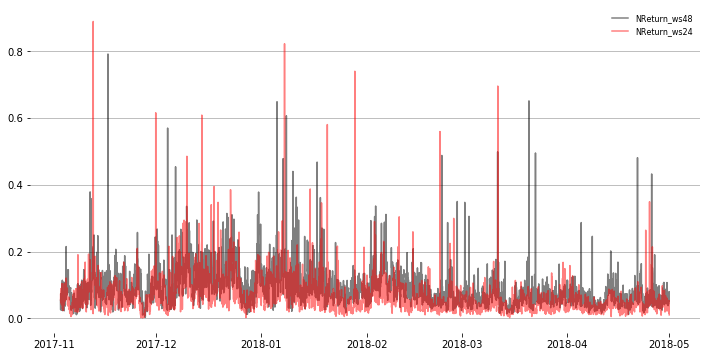

In [7]:
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
plt.plot(lambdas.index,lambdas.FRM_nreturn_ws48, label = 'NReturn_ws48',color='k',alpha=0.5)
plt.plot(lambdas.index,lambdas.FRM_nreturn_ws24, label = 'NReturn_ws24',color='r',alpha=0.5)
plt.grid(axis='y')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.legend(prop={'size': 8},frameon=False,loc='upper right')
plt.savefig('./FRM NReturn ws24 vs ws48.png',transparent=True)

In [8]:
# fig = go.Figure()

# fig.add_trace(go.Scatter(x=lambdas.index, y=lambdas.iloc[:,0],name = 'NReturn_ws48', opacity = 0.5, 
#                          line =dict(color=('rgb(1,1,1)'), width = 1)))
# fig.add_trace(go.Scatter(x=lambdas.index, y=lambdas.iloc[:,3],name = 'NReturn_ws24', opacity = 0.5, 
#                          line =dict(color=('rgb(255,0,0)'), width = 0.9)))
# fig.update_layout(go.Layout(
            
#             paper_bgcolor = 'rgba(0,0,0,0)',
#              plot_bgcolor = 'rgba(0,0,0,0)'
#         ))
# fig.update_layout(title="Window Size 24 vs 48")
# plotly.offline.plot(fig,filename="FRM NReturn ws24 vs ws48.html")

'FRM NReturn ws24 vs ws48.html'

### Compare FRM ws. 48 with weighted BBW 

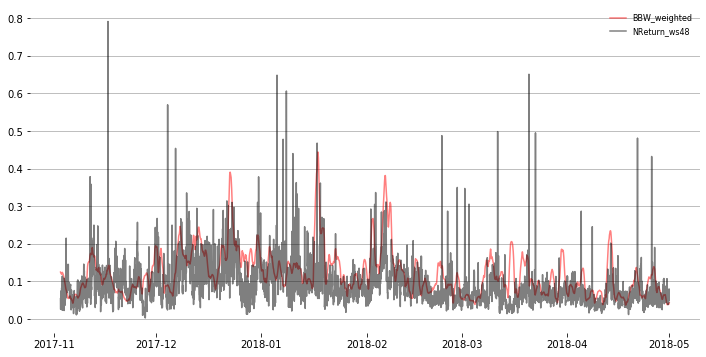

In [9]:
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(111)
plt.plot(pd.to_datetime(BBW.time),BBW['weighted BBW'], label = 'BBW_weighted',color='r',alpha=0.5)

plt.plot(lambdas.index,lambdas.FRM_nreturn_ws48, label = 'NReturn_ws48',color='k',alpha=0.5)

plt.grid(axis='y')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.legend(prop={'size': 8},frameon=False,loc='upper right')
plt.savefig('FRM with weighted BBW.png',transparent=True)

In [10]:
# fig = go.Figure()

# fig.add_trace(go.Scatter(x=BBW.time, y=BBW.iloc[:,-1], name = 'BBW_weighted', opacity = 0.9, 
#                          line =dict(color=('rgb(255,0,0)'), width = 1.2)))
# fig.add_trace(go.Scatter(x=lambdas.index, y=lambdas.iloc[:,0], name = 'FRM', opacity = 0.5, 
#                          line =dict(color=('rgb(1,1,1)'), width = 1)))
# fig.update_layout(go.Layout(
#             paper_bgcolor='rgba(0,0,0,0)',
#             plot_bgcolor='rgba(0,0,0,0)'
#         ))
# fig.update_layout(title="BBW vs FRM")
# plotly.offline.plot(fig,filename="FRM with weighted BBW.html")

'FRM with weighted BBW.html'